# Рынок заведений общественного питания Москвы

Требуется оценить рынок заведений общественного питания, а также предложить свои комментарии по типу заведения, расположению, наличию сети заведений для открытия заведения с обслуживанием при помощи роботов.

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
display(data.head())
print(data.info())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None


In [4]:
# Посчитаем самое часто встречающееся количество мест
data.value_counts('number')

number
0       1621
40       835
20       727
30       685
10       644
        ... 
255        1
248        1
243        1
242        1
1700       1
Length: 315, dtype: int64

In [5]:
data.query('number==1700')

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


In [6]:
# Проверим имеются ли пропуски
data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [7]:
# Выясним имеются ли полные дубликаты строк
data.duplicated().sum()

0

In [8]:
# Проверим нет ли дубликатов в отдельных колонках
for i in data.columns:
    print(i,data[i].duplicated().sum())

id 0
object_name 4973
chain 15364
object_type 15357
address 6258
number 15051


In [9]:
# Переведем тип сетевых ресторанов в логический тип для удобства работы с ними
data['chain'] = data['chain']=='да'

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  bool  
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 615.4+ KB


### Вывод
Привели к нужному типу столбец сетевых ресторанов. Проверили на пропуски и дубликаты, также заметили аномальное значение, позже рассмотрим подробнее их присутствие

In [11]:
#Проверка на неявные дубликаты
data = data.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])

## Анализ данных

In [12]:
plt.style.use('ggplot')

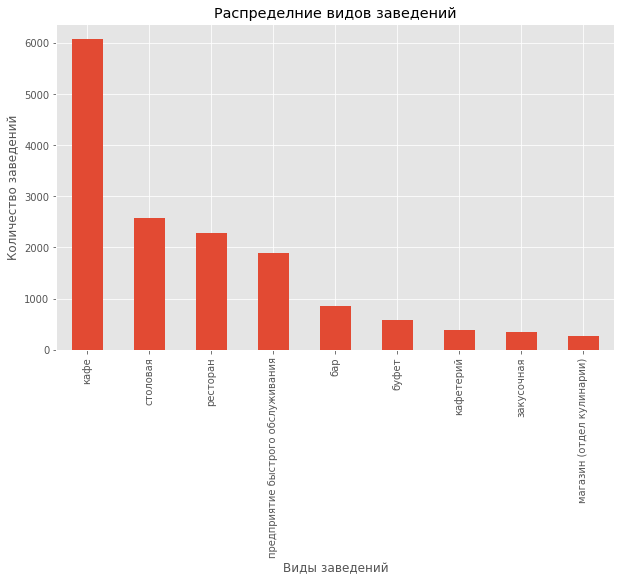

In [13]:
plt.figure(figsize=(10,6))
data.value_counts('object_type').plot(kind='bar')
plt.xlabel('Виды заведений')
plt.ylabel('Количество заведений')
plt.title('Распределние видов заведений');

Наибольшее количество заведений находится в классе "кафе, после идет "столовая", которых в два раза меньше и замыкает тройку "ресторан" немного проигрывая по количеству "столовой"

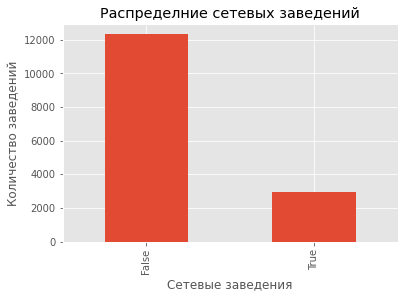

In [14]:
data.value_counts('chain').plot(kind='bar')
plt.xlabel('Сетевые заведения')
plt.ylabel('Количество заведений')
plt.title('Распределние сетевых заведений');

Сетевых заведений в 4 раза меньше, чем несетевых

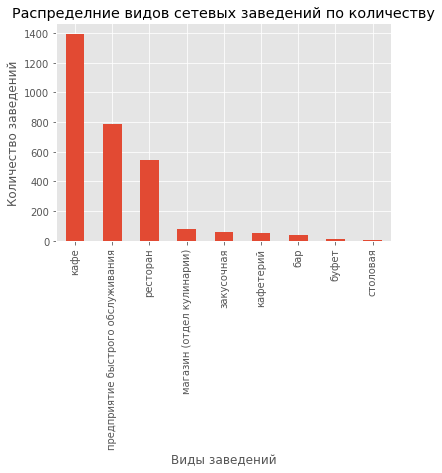

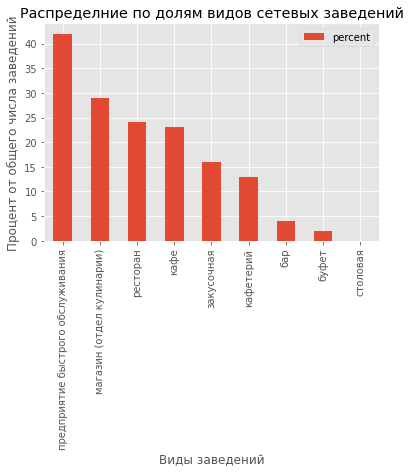

In [15]:
data.query('chain==True').value_counts('object_type').plot(kind='bar')
plt.xlabel('Виды заведений')
plt.ylabel('Количество заведений')
plt.title('Распределние видов сетевых заведений по количеству')
plt.show()
data_chain=data.pivot_table(index='object_type',values='chain',aggfunc=['sum','count']).reset_index().droplevel(1,axis=1)
data_chain['percent'] = round(data_chain['sum']/data_chain['count']*100)
data_chain.sort_values('percent',ascending=False).plot(y='percent',x='object_type', kind='bar')
plt.xlabel('Виды заведений')
plt.ylabel('Процент от общего числа заведений')
plt.title('Распределние по долям видов сетевых заведений')
plt.show()

В сетевых предприятиях по количеству все так же превалирует класс "кафе", но зато после идет класс "фастфуд" и тройку замыкает "ресторан". Сетевые заведения, в большей мере распределены между этими 3 классами.

Но если судить по долям распределения картина совершенно иная, класс "фастфуд" имеет наибольший процент сетевого распространения и за ним идет класс "отделы кулинарии" и замыкает "рестран". Поэтому вероятнее всего сетевым заведением все таки лучше делать предприятие быстрого обслуживания

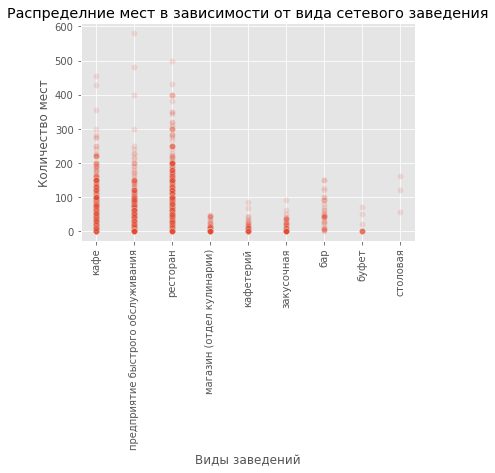

In [16]:
data_chain = data.query('chain==True')
sns.scatterplot(x='object_type', y='number', data=data_chain, alpha=0.15)
plt.xlabel('Виды заведений')
plt.ylabel('Количество мест')
plt.title('Распределние мест в зависимости от вида сетевого заведения')
plt.xticks(rotation = 90);

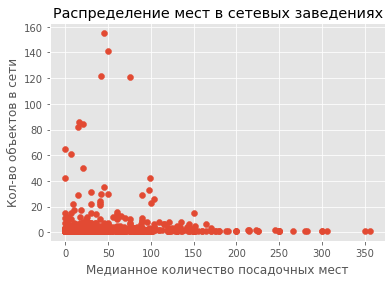

In [17]:
data_scatter=data[data['chain']==True].groupby('object_name').agg({'object_name':'count', 'number':'median'})
plt.scatter(data_scatter['number'],data_scatter['object_name'])
plt.xlabel('Медианное количество посадочных мест')
plt.ylabel('Кол-во объектов в сети')
plt.title('Распределение мест в сетевых заведениях');

Для основной массы сетевых заведений характерно распределение вида много заведений с небольшим количеством мест

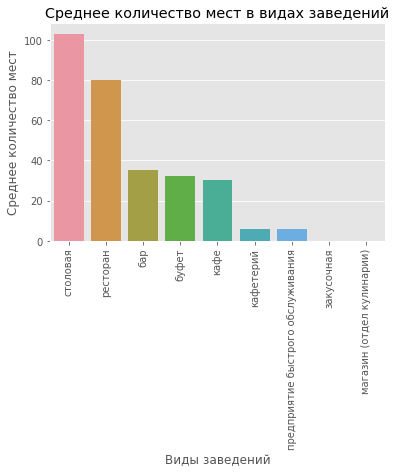

In [18]:
sns.barplot(x='object_type',y='number', data=round(data.pivot_table(index='object_type', values='number', aggfunc='median').sort_values(by='number',ascending=False).reset_index()))
plt.xlabel('Виды заведений')
plt.ylabel('Среднее количество мест')
plt.title('Среднее количество мест в видах заведений')
plt.xticks(rotation=90);

Наибольшее среднее количество мест предоставляет класс "столовая", а после него идет с небольшим проигрышем "ресторан", среднее количество мест 103 и 80 соответственно.

In [19]:
# Запишем ключевые слова в отдельный список, чтобы корректно определять улицы
str_list = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия', 'квартал', 'поселение', 'микрорайон', 'километр', 'зеленоград',
           'территория','просек']
# Функция разделения адреса на части и получения улицы
def street_split(row):
    for part in row.split(', '):
        for street_part in str_list:
            if street_part in part.lower():
                return part
#Применение фукции к новому столбцу 
data['street'] = data['address'].apply(street_split)

Возможно не стоит включать в анализ не самые явные названия улиц, такие как территория, просек, километр....

In [20]:
data['street'].isna().sum()

0

In [21]:
data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


Улицы были добавлены корректно

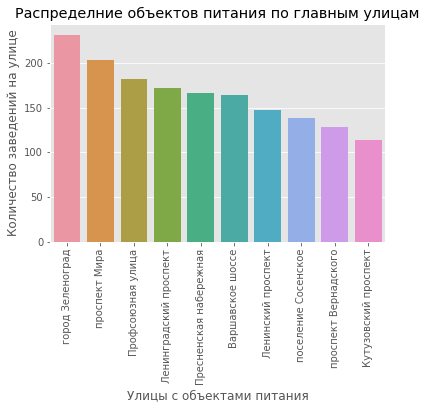

In [22]:
data_street = data.pivot_table(index='street',values='object_type',aggfunc='count').sort_values('object_type', ascending=False).reset_index()
sns.barplot( x='street', y='object_type', data = data_street.head(10))
plt.xlabel('Улицы с объектами питания')
plt.ylabel('Количество заведений на улице')
plt.title('Распределние объектов питания по главным улицам')
plt.xticks(rotation=90);

Данные улицы являютя очень длинными, чаще всего это шоссе или проспекты, протяженностью в несколько километров, поэтому на этих улицах много объектов, стоит задуматься как интерпретировать город Зеленоград, ведь в нем улицы не предусмотрены, воможно его придется убрать из анализа

In [23]:
raion= pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y')
top10 = data_street.head(10).merge(raion[['streetname', 'area']], left_on='street', right_on='streetname').sort_values('object_type',ascending=False)
top10[['street','area']]

,street,area
0,город Зеленоград,Район Крюково
2,город Зеленоград,Панфиловский район
1,город Зеленоград,Район Матушкино-Савелки
3,проспект Мира,Алексеевский район
4,проспект Мира,Ярославский Район
5,проспект Мира,Район Марьина роща
6,проспект Мира,Останкинский район
7,проспект Мира,Район Ростокино
8,проспект Мира,Район Свиблово
9,проспект Мира,Мещанский район


In [24]:
top10 = top10.groupby('street', as_index=False).agg({'object_type':'mean',  'area':'nunique'}).sort_values('object_type',ascending=False)
top10.columns = ['', 'Объектов', 'Районов']
top10

,,Объектов,Районов
6,город Зеленоград,232,3
8,проспект Мира,204,7
5,Профсоюзная улица,182,6
2,Ленинградский проспект,172,4
4,Пресненская набережная,167,1
0,Варшавское шоссе,164,8
3,Ленинский проспект,148,8
7,проспект Вернадского,128,5
1,Кутузовский проспект,114,2


Улицы захватывают не маленькое количество районов

In [25]:
data_street.query('object_type==1')
print('Всего улиц с 1 объектом общественного питания: {}, что составляет {:.1%} от всего кол-ва улиц с объектами общественного питания'
      .format(len(data_street.query('object_type==1')), (len(data_street.query('object_type==1'))/len(data_street))))
print('Районы в которых расположены улицы с 1 объектом:')
for i in data_street.query('object_type==1').merge(raion[['streetname', 'area']], left_on='street', right_on='streetname').sort_values('area')['area'].unique():
    print(i)

Всего улиц с 1 объектом общественного питания: 548, что составляет 29.1% от всего кол-ва улиц с объектами общественного питания
Районы в которых расположены улицы с 1 объектом:
Алексеевский район
Алтуфьевский район
Бабушкинский район
Басманный район
Бескудниковский Район
Бутырский район
Войковский Район
Головинский район
Даниловский район
Дмитровский район
Донской район
Красносельский район
Лосиноостровский район
Мещанский район
Можайский Район
Молжаниновский район
Нагорный район
Нижегородский район
Обручевский район
Останкинский район
Пресненский район
Район Арбат
Район Аэропорт
Район Беговой
Район Бирюлево Восточное
Район Богородское
Район Внуково
Район Восточное Измайлово
Район Восточный
Район Выхино-Жулебино
Район Гагаринский
Район Гольяново
Район Дорогомилово
Район Замоскворечье
Район Западное Дегунино
Район Зюзино
Район Ивановское
Район Измайлово
Район Коньково
Район Коптево
Район Косино-Ухтомский
Район Котловка
Район Крюково
Район Кузьминки
Район Кунцево
Район Куркино
Район Лево

Улиц с 1 объектом общественного питания достаточно много в каждом районе Москвы. Даже в центре Москвы имеются много улиц с 1 объектом, вероятнее всего это может быть вызвано застройкой улицы в промышленных предприятиях или же офисах или магазинов другого назначения. А также это связано с тем, что эти улицы обычно очень маленькие по типу переулков и могут состоять всего лишь из нескокльких строений.

## Вывод
Опираясь на полученные данные, можно сделать вывод, что кафе является наиболее распространненым типом предприятия общественного питания, в котором чаще всего небольшое количество мест около 40 в среднем. Наиболее распространенный вариант расположения это длинные улицы, шоссе и проспекты. Таковыми являются проспект Мира, Профсоюзная улица, Ленинградский проспект. Для сетевого вида лучше было было выбрать ресторан быстрого питания, т.к. для него характерно сетевое распространение.

Предположить наилучшее расположение и тип предприятия общественного питания в Москве без данных об их доходах и расходах будет тяжело, но отправную точку для последующих оценок можно сделать. Наиболее хорошим вариантом было бы сделать сеть кафе, с обслуживанием при помощи роботов, недалеко от центра и не сильно удаленное от метро. Для такого кафе требуется хорошая проходимость, а так же наличие туристических объектов, поэтому подошли бы Кутузовский проспект, проспект Мира или же проспект Вернадского. Важно заметить, что такому кафе не будут сильно мешать конкуренты, это вероятнее всего будет даже преимуществом, т.к. конкуренция развивает интерес.

<b> Презентация: </b> https://disk.yandex.ru/i/mZ3H2EDEgtWHnA